##### Scalars (0D tensors)

A tensor that contains only one number is called a 'scalar' (or scalar tensor, or 0-dimensional tensor, or 0D tensor). In Numpy, a 'float32' or 'float64' number is a scalar tensor (or scalar array). 

We can display the number of axes of a Numpy tensor via 'ndim' attribute

The number of axes of a tensor is also called its rank 

In [2]:
import numpy as np
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

##### Vectors (1D tensors)

An array of numbers is caleld a vector, or 1D tensor. A 1D tensor is said to have exactly one axis

In [4]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [5]:
x.ndim

1

##### Matrices (2D tensors)

An array of vectors is a matrix, or 2D tensor. It can be visually interpret as a rectangular grid of numbers

In [7]:
x = np.array([[5, 78, 2, 34, 0], 
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.ndim

2

##### 3D tensors and higher-dimensional tensors

A 3D tensor packs such matrices in a new array, which can visually interpret as a cube of numbers

In [8]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

By packing 3D tensors in an array, we can create a 4D tensor, and so on. In deep learning, we generally manipulate tensors taht are 0D to 4D, although there can be 5D for processing video data

##### Key attributes

A tensor is defined by three key attributes:

'Number of axes (rank)' -- this is alos called the tensor's 'ndim' in Python libraries such as Numpy

'Shape' -- this is a tuple of integers taht describes how many dimensions the tensor has along each axies

'Data type (usually called 'dtype' in Python libraries)' -- this is the type of the data contained in the tensor; for instance, a tensor's type could be 'float32', 'uint8', 'float64', and so on. On rare occasions, there may be a 'char' tensor. Note that string tensorrs don't exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation. 

to make this more concrete, for the MNIST exmple

load the MNIST dataset

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

display the number of axes of the tensor 'train_images', the ndim attribute:

In [2]:
print(train_images.ndim)

3


here's its shape:

In [3]:
print(train_images.shape)

(60000, 28, 28)


and this is its data type, the 'dtype' attribute:

In [4]:
print(train_images.dtype)

uint8


So here is a 3D tensor of 8-bit integers. More precisely, it's an arry of 60,000 matrices of 28 x 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255

display the fourth digit (using the library Matplotlib)

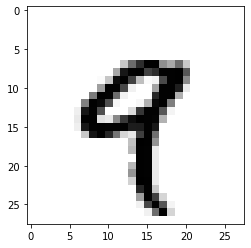

In [5]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

##### Manipulating tensors in Numpy

Previously, we selected a specific digit alongside the first axis using the syntax 'train_images[i]'. Selecting specific elements in a tensor is called tensor slicing

the following selects digits #10 to #100 (#100 isn't included) and put them in an array of shape (90, 28, 28):

In [6]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


it's equivalen to following more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that ':' is equivalen to selecting the entire axis:

In [7]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [8]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

For select between any two indices along each tensor axis, for instance, select 14 x 14 pixels in the bottom-right corner of all images:

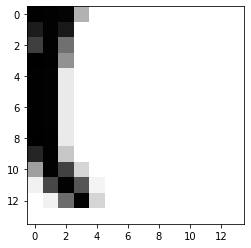

In [13]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap = plt.cm.binary)
plt.show()

it's also possible to use negative indices. Much like negative indices in python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of 14 x 14 pixels centered in the middle: 

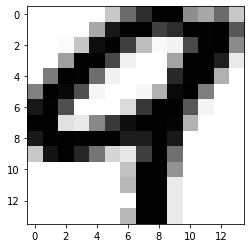

In [12]:
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[4], cmap = plt.cm.binary)
plt.show()

##### The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensor in deep learning will be the samples axis (sometimes called the samples dimension). In ths MNIST example, samples are images of digits.

In addition, deep-learning models don't process an entire dataset at once; rather, they break the data into small batches. Concretely, here's one batch of our MNIST digits, with batch size of 128:

In [ ]:
batch = train_images[;128]

and here's the next batch

In [ ]:
batch = train_images[128:256]

and the 'n'th batch:

In [ ]:
batch = train_images[128 * n:128 * (n + 1)]

when considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term frequently encounter when using Keras and other deep-learning library

##### Real-world examples of data tensors

To be more concretely, the data manipulated will almost always fall into on of the following categories:

- 'Vector data' -- 2D tensors of shape (samples, features)

- 'Timeseries data or sequence data' -- 3D tensors of shape (samples, timesteps, features)

- 'Images' -- 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

- 'Video' -- 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

##### Vector data

This is  the most common case. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of vectors), where the first axis is the samples axis and the second axis is the features axis.

- An actuarial dataset of people, where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3) .

- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (onecount per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000) .

##### Timeseries data or sequence data

Whenever time matters in the data (or the notion of sequence order), it makes sense to store it in a 3D tensor wit an explicit time axis. Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor

The time axis is always the second axis (axis of index 1)

- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, 3) . Here, each sample would be one day’s worth of data.

- A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128) , and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

##### Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D , with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1) , and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)

There are two conventions for shapes of images tensors: the channels-last convention (used by TensorFlow) and the channels-first convention (used by Theano). The TensorFlow machine-learning framework, from Google, places the color-depth axis at the end: (samples, height, width, color_depth) . Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the Theano convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256) . The Keras framework provides support for both formats.

##### Video data

Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth) , a sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth) , and thus a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth) .

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3) . That’s a total of 106,168,320 values! If the dtype of the tensor was float32 , then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32 , and they’re typically compressed by a large factor (such as in the MPEG format).